In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values for numerical columns with the median value
df = df.fillna(df.median())

# Convert the 'Gender' column to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Display the transformed dataset
print(df.head())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40


C:\Users\Vrishin Dharmesh KP\AppData\Local\Temp\ipykernel_17368\615383574.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [8]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']

# Scale the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Display the scaled features
print(df[features].head())


        Age  Annual Income (k$)  Spending Score (1-100)    Gender
0 -1.424569           -1.738999               -0.434801 -1.128152
1 -1.281035           -1.738999                1.195704 -1.128152
2 -1.352802           -1.700830               -1.715913  0.886405
3 -1.137502           -1.700830                1.040418  0.886405
4 -0.563369           -1.662660               -0.395980  0.886405


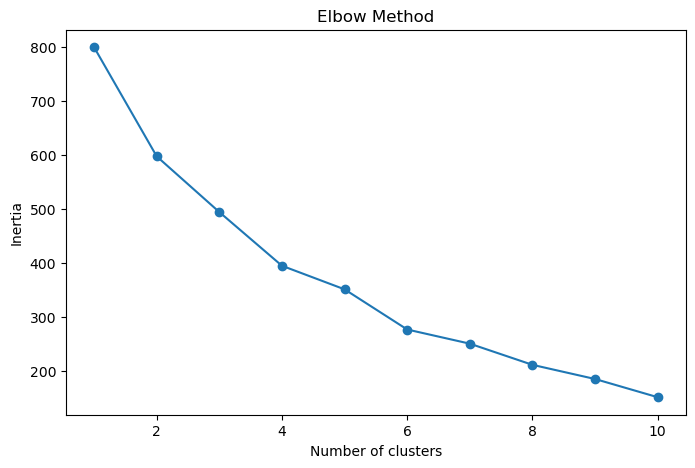

   CustomerID    Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1 -1.128152 -1.424569           -1.738999               -0.434801   
1           2 -1.128152 -1.281035           -1.738999                1.195704   
2           3  0.886405 -1.352802           -1.700830               -1.715913   
3           4  0.886405 -1.137502           -1.700830                1.040418   
4           5  0.886405 -0.563369           -1.662660               -0.395980   

   Cluster  
0        2  
1        2  
2        4  
3        4  
4        4  


In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the elbow method to find the optimal number of clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df[features])
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on the elbow method, we choose an appropriate number of clusters (e.g., 5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

# Display the cluster assignment
print(df.head())


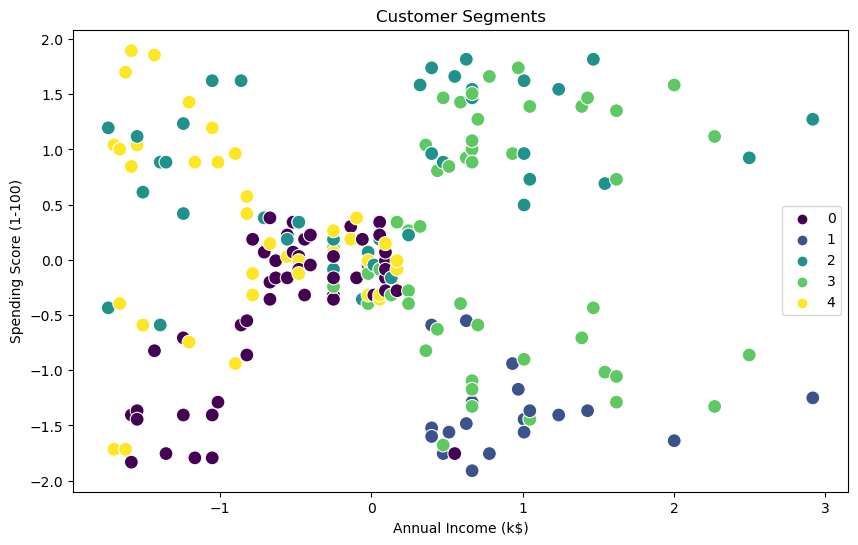

In [10]:
import seaborn as sns

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
